<a href="https://colab.research.google.com/github/rawbil/models_V1/blob/main/titanic_model/csvs/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Survival in the Titanic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore') # Ignore warnings and focus on main output

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df
# NULL ROWS
"""
- Age
- Cabin
- Embarked
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\n- Age\n- Cabin\n- Embarked\n'

In [ ]:
# Check for empty rows
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Remove NULL age and Embarked rows
df.dropna(subset=["Age", "Embarked"], inplace=True)

# Replace NULL Cabin values with "Unknown"
df.fillna({"Cabin": "Unknown"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
# Look for duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Unknown,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Re-arrange Columns
new_cols = ['PassengerId', "Name", "Ticket", "Pclass", "Cabin", "Embarked", "SibSp", "Parch", "Age", "Fare", "Sex", "Survived"]
df = df[new_cols]
df

,PassengerId,Name,Ticket,Pclass,Cabin,Embarked,SibSp,Parch,Age,Fare,Sex,Survived
0,1,"Braund, Mr. Owen Harris",A/5 21171,3,Unknown,S,1,0,22.0,7.2500,male,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C85,C,1,0,38.0,71.2833,female,1
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,Unknown,S,0,0,26.0,7.9250,female,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1,C123,S,1,0,35.0,53.1000,female,1
4,5,"Allen, Mr. William Henry",373450,3,Unknown,S,0,0,35.0,8.0500,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,"Rice, Mrs. William (Margaret Norton)",382652,3,Unknown,Q,0,5,39.0,29.1250,female,0
886,887,"Montvila, Rev. Juozas",211536,2,Unknown,S,0,0,27.0,13.0000,male,0
887,888,"Graham, Miss. Margaret Edith",112053,1,B42,S,0,0,19.0,30.0000,female,1
889,890,"Behr, Mr. Karl Howell",111369,1,C148,C,0,0,26.0,30.0000,male,1


In [ ]:
# Convert Sex Col to Integer
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True, dtype=int)
df
# 1 - Male
# 0 - Female

,PassengerId,Name,Ticket,Pclass,Cabin,Embarked,SibSp,Parch,Age,Fare,Sex,Survived
0,1,"Braund, Mr. Owen Harris",A/5 21171,3,Unknown,S,1,0,22.0,7.2500,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,C85,C,1,0,38.0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,Unknown,S,0,0,26.0,7.9250,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1,C123,S,1,0,35.0,53.1000,0,1
4,5,"Allen, Mr. William Henry",373450,3,Unknown,S,0,0,35.0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,"Rice, Mrs. William (Margaret Norton)",382652,3,Unknown,Q,0,5,39.0,29.1250,0,0
886,887,"Montvila, Rev. Juozas",211536,2,Unknown,S,0,0,27.0,13.0000,1,0
887,888,"Graham, Miss. Margaret Edith",112053,1,B42,S,0,0,19.0,30.0000,0,1
889,890,"Behr, Mr. Karl Howell",111369,1,C148,C,0,0,26.0,30.0000,1,1


#**Visualize Data**

### **Survival Count**



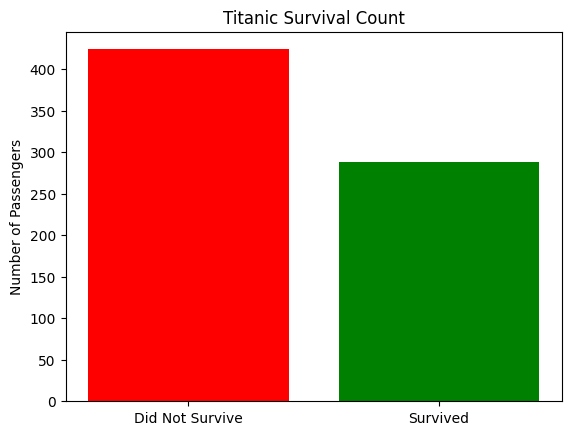

In [ ]:
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values, color=['red', 'green'])
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Titanic Survival Count')
plt.show()


## Sex Count

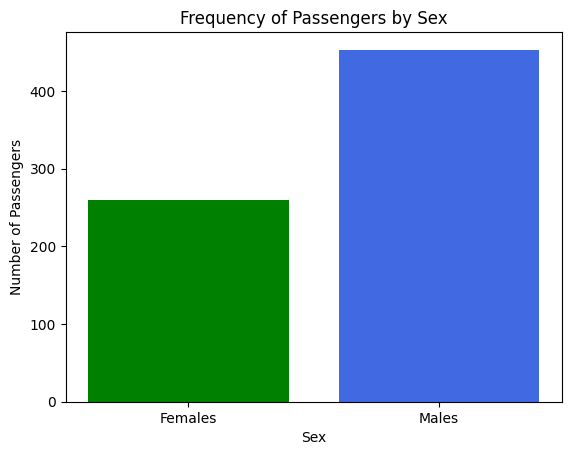

(453, 12)

In [ ]:
v = df["Sex"].value_counts()# returns a series with each value having its frequency count
# dir(v)
len(v)
# for i in range(len(v)):
#   print(v.index[i], v.values[i])

plt.bar(v.index, v.values, color=['royalblue', 'green'])
plt.xticks([0, 1], ["Females", "Males"])
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Frequency of Passengers by Sex")
plt.show()
df[df["Sex"].isin([1])].shape

## Embarked

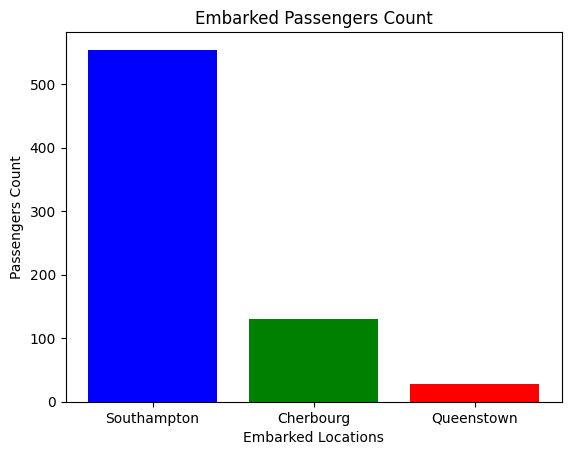

,count
Embarked,
S,554
C,130
Q,28


In [ ]:

embarked_count = df["Embarked"].value_counts()
plt.bar(embarked_count.index, embarked_count.values, color=["blue", "green", "red"])
plt.xticks([0, 1, 2], ["Southampton", "Cherbourg", "Queenstown"])
plt.title("Embarked Passengers Count")
plt.xlabel("Embarked Locations")
plt.ylabel("Passengers Count")
plt.show()
embarked_count

## Passenger Class

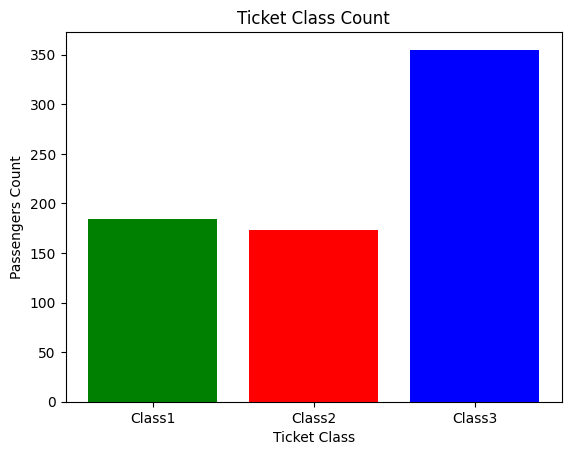

,count
Pclass,
3,355
1,184
2,173


In [ ]:

pclass_count = df["Pclass"].value_counts()
plt.bar(pclass_count.index, pclass_count.values, color=["blue", "green", "red"])
plt.xticks([1, 2, 3], ["Class1", "Class2", "Class3"])
plt.title("Ticket Class Count")
plt.xlabel("Ticket Class")
plt.ylabel("Passengers Count")
plt.show()
pclass_count

## Fare

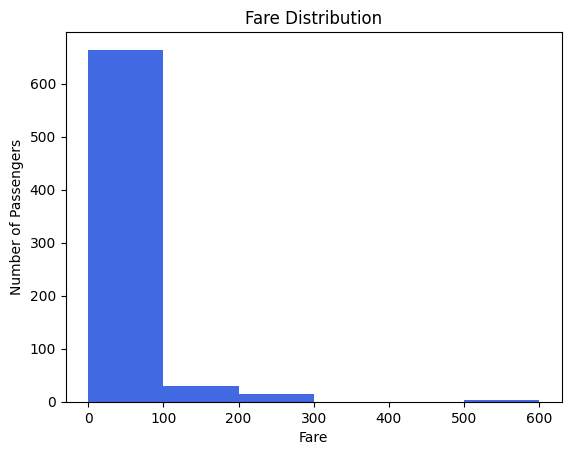

In [ ]:
plt.hist(df["Fare"], bins=[0, 100, 200, 300, 400, 500, 600], color="royalblue", density=False, alpha=1)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

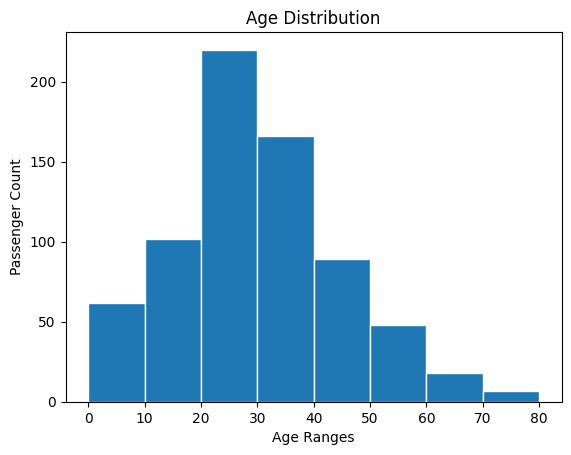

In [122]:
plt.hist(df["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], edgecolor="#fff")
plt.title("Age Distribution")
plt.xlabel("Age Ranges")
plt.ylabel("Passenger Count")
plt.show()

## Parent-Child and Sibling-Spouse

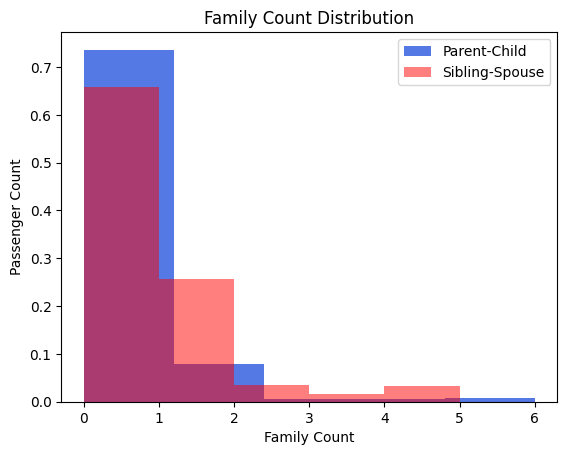

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
plt.hist(df["Parch"],bins=5, color="royalblue", alpha=0.9, label="Parent-Child", density=True)
plt.hist(df["SibSp"], bins=5, color="red", alpha=0.5, label="Sibling-Spouse", density=True)
plt.legend()
plt.title("Family Count Distribution")
plt.xlabel("Family Count")
plt.ylabel("Passenger Count")
plt.show()
df["Parch"].unique()
# df["SibSp"].unique()

## Cabin

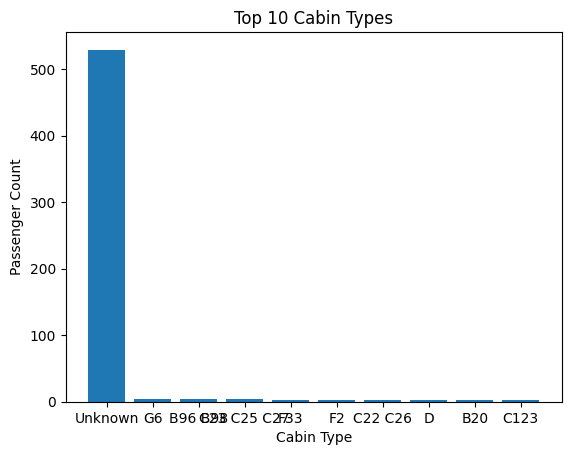

,count
Cabin,
Unknown,529
G6,4
B96 B98,4
C23 C25 C27,4
F33,3
F2,3
C22 C26,3
D,3
B20,2


In [ ]:
df["Cabin"].unique()
top_cabins = df["Cabin"].value_counts()[:10]
plt.bar(top_cabins.index, top_cabins.values)
plt.title("Top 10 Cabin Types")
plt.xlabel("Cabin Type")
plt.ylabel("Passenger Count")
plt.show()
top_cabins

# **Visualization in Comparison to Survival**

> Compare Different Metrics With Survival to see how each of them affect survival



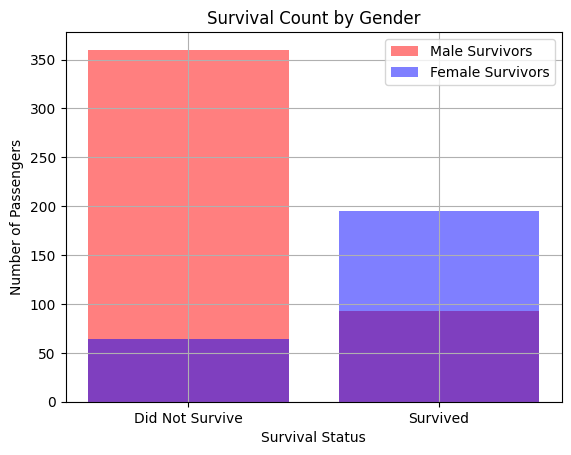

Male Survived: 
 Survived
0    360
1     93
Name: count, dtype: int64
Female Survived: 
 Survived
0     64
1    195
Name: count, dtype: int64


In [132]:
# SURVIVAL IN COMPARISON TO GENDER
male_survived = df[df["Sex"].isin([1])]["Survived"].value_counts()
female_survived = df[df["Sex"] == 0]["Survived"].value_counts(ascending=True)

plt.bar([0, 1], male_survived.values, color="red", alpha=0.5, label="Male Survivors")
plt.bar([0, 1], female_survived.values, color="blue", alpha=0.5, label="Female Survivors")

plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Gender")
plt.legend()
plt.grid()
plt.show()

print("Male Survived: \n", male_survived)
print("Female Survived: \n", female_survived)

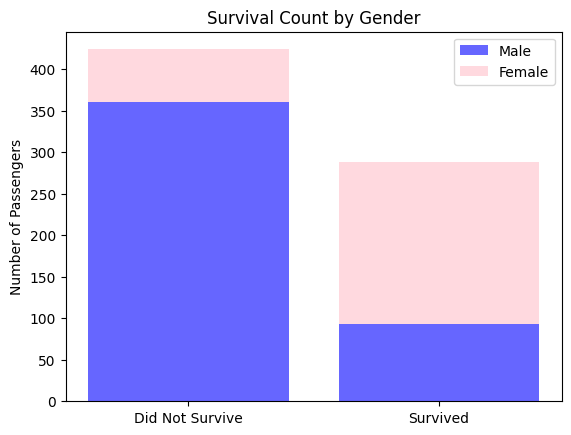

In [131]:
male_survived = df[df['Sex'] == 1]['Survived'].value_counts()
female_survived = df[df['Sex'] == 0]['Survived'].value_counts(ascending=True)

plt.bar([0, 1], male_survived.values, color='blue', alpha=0.6, label='Male')
plt.bar([0, 1], female_survived.values, color='pink', alpha=0.6, label='Female', bottom=male_survived.values)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Gender')
plt.legend()
plt.show()


*Conclusion*: Survival Rate of Females is higher than males
- Could be because they prioritized women in the rescue operation.

# **✔✔**




## Survival Rage in Relation to Embarking Location

In [124]:
southampton_survived = df[df["Embarked"] == "S"]["Survived"].value_counts()
southampton_survived

,count
Survived,
0,353
1,201


In [133]:
cherbourg_survived = df[df["Embarked"] == "C"]["Survived"].value_counts(ascending=True)
cherbourg_survived

,count
Survived,
0,51
1,79


In [135]:
queenstown_survived = df[df["Embarked"].isin(["Q"])]["Survived"].value_counts()
queenstown_survived

,count
Survived,
0,20
1,8


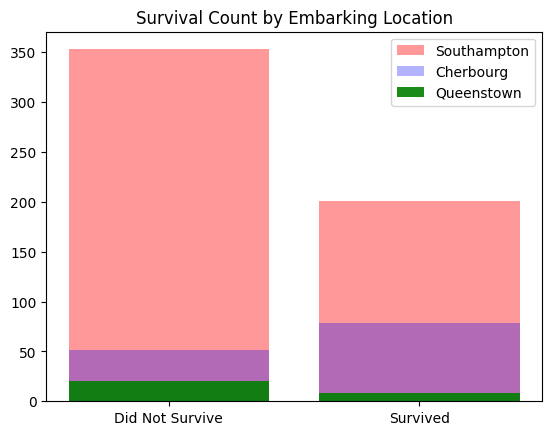

In [148]:
plt.bar([0, 1], southampton_survived.values, color="red", alpha=0.4, label="Southampton")
plt.bar([0, 1], cherbourg_survived.values, color="blue", alpha=0.3, label="Cherbourg")
plt.bar([0, 1], queenstown_survived.values, color="green", alpha=0.9, label="Queenstown")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])

plt.legend()
plt.title("Survival Count by Embarking Location")
plt.show()

*Conclusion: * Passengers who boarded at Southampton survived the most, and also died the most

## Survival In Relation to Age
- Which age range has the highest survival rate?

(288,)
(424,)


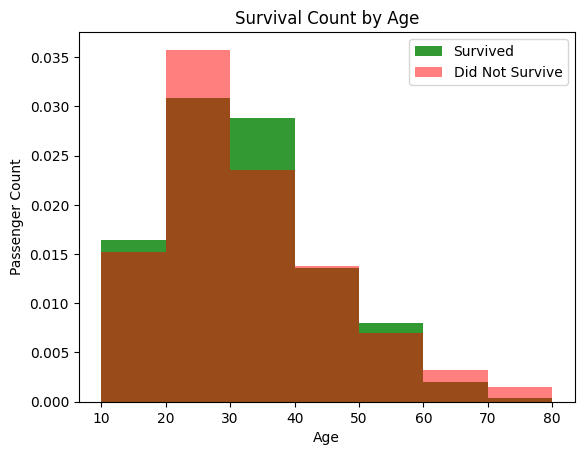

In [174]:
# ages = plt.hist(df["Age"], bins=[10, 20, 30, 40, 50, 60, 70, 80])

survived_ages = df.loc[df["Survived"] == 1, "Age"]
d_ages = df.loc[df["Survived"] == 0, "Age"]
print(survived_ages.shape)
print(d_ages.shape)

plt.hist(survived_ages, bins=[10, 20, 30, 40, 50, 60, 70, 80], color="green", alpha=0.8, label="Survived", density=True)
plt.hist(d_ages, bins=[10, 20, 30, 40, 50, 60, 70, 80], color="red", alpha=0.5, label="Did Not Survive", density=True)
plt.legend()
plt.title("Survival Count by Age")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.show()




*Conclusion*
- Younger passengers between age 10-20 survived by a small number.
  - Could be because they prioritized children in the rescue.
- Passengers between ages 30 to 40 survived by the highest margin.
- Elder passengers had a higher percentage dying
- Passengers between ages 20 - 30 died the most.
  - This could be due to them being the last priority in the rescue mission because they are considered energetic compared to the other age groups.

(288,)
(424,)


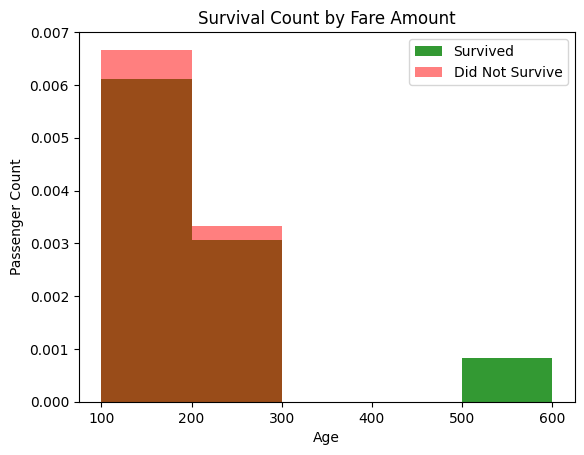

In [177]:
# Survival by Fare Amount
survived_pass = df.loc[df["Survived"] == 1, "Fare"]
d_ages = df.loc[df["Survived"] == 0, "Fare"]
print(survived_pass.shape)
print(d_ages.shape)

plt.hist(survived_pass, bins=[100, 200, 300, 400, 500, 600], color="green", alpha=0.8, label="Survived", density=True)
plt.hist(d_ages, bins=[100, 200, 300, 400, 500, 600], color="red", alpha=0.5, label="Did Not Survive", density=True)
plt.legend()
plt.title("Survival Count by Fare Amount")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.show()

*Conclusion*
- The richest Passengers by Fare amount survived by 100% because they had access to life boats

## Survival by PClass

In [182]:
p1 = df[df["Pclass"].isin([1])]["Survived"].value_counts(ascending=True)
p1

,count
Survived,
0,64
1,120


In [180]:
p2 = df[df["Pclass"].isin([2])]["Survived"].value_counts()
p2

,count
Survived,
0,90
1,83


In [181]:
p3 = df[df["Pclass"].isin([3])]["Survived"].value_counts()
p3

,count
Survived,
0,270
1,85


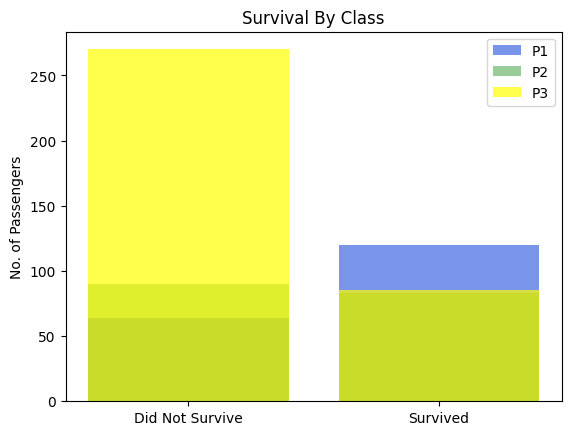

In [206]:
plt.bar([0, 1], p1.values, color="royalblue", alpha=0.7, label="P1")
plt.bar([0, 1], p2.values, color="green", alpha=0.4, label="P2")
plt.bar([0, 1], p3.values, color="yellow", alpha=0.7, label="P3")

plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.title("Survival By Class")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

*Conclusion*
- Class 1 passengers survived the most due to access to life boats and Cabin location(upper decks)
- Class 3 passengers died the most